# Code clone các folder từ github về

In [5]:
!pip install -r https://raw.githubusercontent.com/explainingai-code/Yolov1-PyTorch/master/requirements.txt

In [6]:
!git clone https://github.com/explainingai-code/Yolov1-PyTorch.git
%cd Yolov1-PyTorch

Cloning into 'Yolov1-PyTorch'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 53 (delta 20), reused 39 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 23.60 KiB | 1.18 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/kaggle/working/Yolov1-PyTorch


# Code kiểm tra file config để có thể điều chỉnh tham số

In [6]:
!cat /kaggle/working/Yolov1-PyTorch/config/voc.yaml

dataset_params:
  train_im_sets: ['data/VOC2007', 'data/VOC2012']
  test_im_sets: ['data/VOC2007-test']
  num_classes : 20
  im_size : 448

model_params:
  im_channels : 3
  backbone_channels : 512
  conv_spatial_size : 7
  yolo_conv_channels : 1024
  leaky_relu_slope : 0.1
  fc_dim : 4096
  fc_dropout : 0.5
  S : 7
  B : 2
  use_sigmoid : True
  use_conv : True

train_params:
  task_name: 'voc'
  seed: 1111
  acc_steps: 1 # increase if you want to get gradients from >1 steps(kind of mimicking >1 batch size)
  log_steps: 100
  num_epochs: 40
  batch_size: 64
  lr_steps: [ 50, 75, 100, 125 ]
  lr: 0.001
  infer_conf_threshold : 0.2
  eval_conf_threshold : 0.001
  nms_threshold : 0.5
  ckpt_name: 'yolo_voc2007.pth'


# Code để thay đổi số epoch

In [7]:
with open('/kaggle/working/Yolov1-PyTorch/config/voc.yaml', 'r') as file:
    content = file.read()


content = content.replace('num_epochs: 135', 'num_epochs: 40')
with open('/kaggle/working/Yolov1-PyTorch/config/voc.yaml', 'w') as file:
    file.write(content)

# Code để tải các file dataset PASCAL qua các năm để tiến hành huấn luyện

In [8]:
!mkdir -p data

# Tải 
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar -P data/
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar -P data/
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar -P data/
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -P data/

# Giải nén
!cd data && tar -xf VOCtrainval_06-Nov-2007.tar
!cd data && tar -xf VOCtest_06-Nov-2007.tar
!cd data && tar -xf VOCdevkit_08-Jun-2007.tar
!cd data && tar -xf VOCtrainval_11-May-2012.tar


# Tạo cấu trúc thư mục phù hợp
!mkdir -p /content/Yolov1-PyTorch/data/VOC2007/JPEGImages
!mkdir -p /content/Yolov1-PyTorch/data/VOC2007/Annotations
!mkdir -p /content/Yolov1-PyTorch/data/VOC2007/ImageSets/Main

!mkdir -p /content/Yolov1-PyTorch/data/VOC2007-test/JPEGImages
!mkdir -p /content/Yolov1-PyTorch/data/VOC2007-test/Annotations

!mkdir -p /content/Yolov1-PyTorch/data/VOC2012/JPEGImages
!mkdir -p /content/Yolov1-PyTorch/data/VOC2012/Annotations
!mkdir -p /content/Yolov1-PyTorch/data/VOC2012/ImageSets/Main


!cp -r data/VOCdevkit/VOC2007/JPEGImages/* /content/Yolov1-PyTorch/data/VOC2007/JPEGImages/
!cp -r data/VOCdevkit/VOC2007/Annotations/* /content/Yolov1-PyTorch/data/VOC2007/Annotations/
!cp -r data/VOCdevkit/VOC2007/ImageSets/Main/* /content/Yolov1-PyTorch/data/VOC2007/ImageSets/Main/
!cp -r data/VOCdevkit/VOC2007/JPEGImages/* /content/Yolov1-PyTorch/data/VOC2007-test/JPEGImages/
!cp -r data/VOCdevkit/VOC2007/Annotations/* /content/Yolov1-PyTorch/data/VOC2007-test/Annotations/
!cp -r data/VOCdevkit/VOC2012/JPEGImages/* /content/Yolov1-PyTorch/data/VOC2012/JPEGImages/
!cp -r data/VOCdevkit/VOC2012/Annotations/* /content/Yolov1-PyTorch/data/VOC2012/Annotations/
!cp -r data/VOCdevkit/VOC2012/ImageSets/Main/* /content/Yolov1-PyTorch/data/VOC2012/ImageSets/Main/

--2025-05-09 05:22:36--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘data/VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  36.5MB/s    in 15s     

2025-05-09 05:22:51 (30.2 MB/s) - ‘data/VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2025-05-09 05:22:51--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘data/VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[====

# Code fix lỗi cho file train.py

In [9]:
# Đọc file
with open('/kaggle/working/Yolov1-PyTorch/tools/train.py', 'r') as file:
    content = file.read()

insert_code = '''import sys
import os

# Thêm thư mục gốc của dự án vào sys.path
current_dir = os.path.dirname(os.path.abspath(__file__))
parent_dir = os.path.dirname(current_dir)  # Đây là thư mục gốc Yolov1-PyTorch
sys.path.append(parent_dir)

'''

if 'import sys' not in content:
    if 'from models.yolo import YOLOV1' in content:
        content = content.replace('from models.yolo import YOLOV1', insert_code + 'from models.yolo import YOLOV1')
    else:
        content = insert_code + content

# Ghi lại vào file
with open('/kaggle/working/Yolov1-PyTorch/tools/train.py', 'w') as file:
    file.write(content)

# Cài đặt các thư viện phù hợp

In [10]:
!pip uninstall -y numpy
!pip uninstall -y albumentations albucore
!pip uninstall -y scikit-learn

!pip install numpy==1.24.3
!pip install albumentations==1.3.1
!pip install scikit-learn==1.2.2

Found existing installation: numpy 2.0.1
Uninstalling numpy-2.0.1:
  Successfully uninstalled numpy-2.0.1
Found existing installation: albumentations 1.4.13
Uninstalling albumentations-1.4.13:
  Successfully uninstalled albumentations-1.4.13
Found existing installation: albucore 0.0.23
Uninstalling albucore-0.0.23:
  Successfully uninstalled albucore-0.0.23
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.0 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scikit-learn>=0.22.0, which is not installed.
eli5 0.13.0 requires scikit-learn>=0.20, which is not installed.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, which is not installed.
woodwork 0.31.0 requires sci

# Config file để train.pyh để tinh chỉnh việc lưu trữ mô hình đã train

In [ ]:
# Đọc file
with open('/kaggle/working/Yolov1-PyTorch/tools/train.py', 'r') as file:
    content = file.read()

old_ckpt_check = """if os.path.exists(os.path.join(train_config['task_name'],
                                   train_config['ckpt_name'])):
        print('Loading checkpoint as one exists')
        yolo_model.load_state_dict(torch.load(
            os.path.join(train_config['task_name'],
                         train_config['ckpt_name']),
            map_location=device))
    if not os.path.exists(train_config['task_name']):
        os.mkdir(train_config['task_name'])"""

new_ckpt_check = """    # Thiết lập đường dẫn lưu trữ Kaggle
    kaggle_output_dir = '/kaggle/working/'
    checkpoint_path = os.path.join(kaggle_output_dir, train_config['ckpt_name'])
    
    # Kiểm tra xem checkpoint có tồn tại không
    if os.path.exists(checkpoint_path):
        print(f'Loading checkpoint from {checkpoint_path}')
        yolo_model.load_state_dict(torch.load(checkpoint_path, map_location=device))"""

content = content.replace(old_ckpt_check, new_ckpt_check)

old_save = """torch.save(yolo_model.state_dict(), os.path.join(train_config['task_name'],
                                                         train_config['ckpt_name']))"""

new_save = """        # Lưu mô hình vào đường dẫn Kaggle
        torch.save(yolo_model.state_dict(), checkpoint_path)"""

content = content.replace(old_save, new_save)

with open('/kaggle/working/Yolov1-PyTorch/tools/train.py', 'w') as file:
    file.write(content)

print("Đã sửa đổi file train.py để lưu mô hình vào /kaggle/working/")

Đã sửa đổi file train.py để lưu mô hình vào /kaggle/working/


# Tiến hành huấn luyện với 40 epochs

In [12]:
%cd /content/Yolov1-PyTorch
!python /kaggle/working/Yolov1-PyTorch/tools/train.py --config /kaggle/working/Yolov1-PyTorch/config/voc.yaml

/content/Yolov1-PyTorch
{'dataset_params': {'train_im_sets': ['data/VOC2007', 'data/VOC2012'], 'test_im_sets': ['data/VOC2007-test'], 'num_classes': 20, 'im_size': 448}, 'model_params': {'im_channels': 3, 'backbone_channels': 512, 'conv_spatial_size': 7, 'yolo_conv_channels': 1024, 'leaky_relu_slope': 0.1, 'fc_dim': 4096, 'fc_dropout': 0.5, 'S': 7, 'B': 2, 'use_sigmoid': True, 'use_conv': True}, 'train_params': {'task_name': 'voc', 'seed': 1111, 'acc_steps': 1, 'log_steps': 100, 'num_epochs': 40, 'batch_size': 64, 'lr_steps': [50, 75, 100, 125], 'lr': 0.001, 'infer_conf_threshold': 0.2, 'eval_conf_threshold': 0.001, 'nms_threshold': 0.5, 'ckpt_name': 'yolo_voc2007.pth'}}
{0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
Total 16551 images found
Downloading: "https://downloa

# Code chạy file infer để nhận diện trên mô hình đã huấn luyện

{'dataset_params': {'train_im_sets': ['data/VOC2007', 'data/VOC2012'], 'test_im_sets': ['data/VOC2007-test'], 'num_classes': 20, 'im_size': 448}, 'model_params': {'im_channels': 3, 'backbone_channels': 512, 'conv_spatial_size': 7, 'yolo_conv_channels': 1024, 'leaky_relu_slope': 0.1, 'fc_dim': 4096, 'fc_dropout': 0.5, 'S': 7, 'B': 2, 'use_sigmoid': True, 'use_conv': True}, 'train_params': {'task_name': 'voc', 'seed': 1111, 'acc_steps': 1, 'log_steps': 100, 'num_epochs': 40, 'batch_size': 64, 'lr_steps': [50, 75, 100, 125], 'lr': 0.001, 'infer_conf_threshold': 0.2, 'eval_conf_threshold': 0.001, 'nms_threshold': 0.5, 'ckpt_name': 'yolo_voc2007.pth'}}


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 182MB/s] 


Kết quả đã được lưu tại: yolo_output/result.jpg


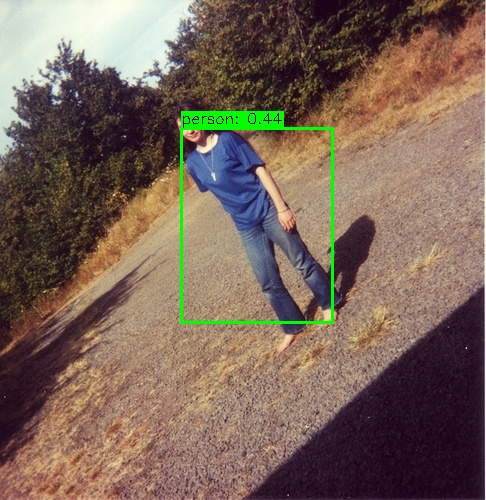

In [ ]:
import torch
import os
import yaml
import cv2
import numpy as np
from models.yolo import YOLOV1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

MODEL_PATH = '/kaggle/input/yolo-model-40/yolomodel.pth'
TEST_IMAGE_PATH = '/kaggle/input/image-test/2007_000027.jpg'
CONFIG_PATH = 'config/voc.yaml'  

def visualize(image, bboxes, category_ids, category_id_to_name, scores=None):
    img = image.copy()
    for idx, bbox in enumerate(bboxes):
        x1, y1, x2, y2 = [int(coord) for coord in bbox]
        cat_id = int(category_ids[idx])
        label = category_id_to_name[cat_id]
        
        color = (0, 255, 0)  
        
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        
        text = label
        if scores is not None:
            text += f": {scores[idx]:.2f}"
        
        (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        cv2.rectangle(img, (x1, y1 - text_height - 5), (x1 + text_width, y1), color, -1)
        
        cv2.putText(img, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
    
    return img

def convert_yolo_pred_x1y1x2y2(yolo_pred, S, B, C, use_sigmoid=False):
    out = yolo_pred.reshape((S, S, 5 * B + C))
    if use_sigmoid:
        out[..., :5 * B] = torch.nn.functional.sigmoid(out[..., :5 * B])
    out = torch.clamp(out, min=0., max=1.)
    class_score, class_idx = torch.max(out[..., 5 * B:], dim=-1)

    shifts_x = torch.arange(0, S, dtype=torch.int32, device=out.device) * 1 / float(S)
    shifts_y = torch.arange(0, S, dtype=torch.int32, device=out.device) * 1 / float(S)
    shifts_y, shifts_x = torch.meshgrid(shifts_y, shifts_x, indexing="ij")

    boxes = []
    confidences = []
    labels = []
    for box_idx in range(B):
        boxes_x1 = ((out[..., box_idx * 5] * 1 / float(S) + shifts_x) -
                    0.5 * torch.square(out[..., 2 + box_idx * 5])).reshape(-1, 1)
        boxes_y1 = ((out[..., 1 + box_idx * 5] * 1 / float(S) + shifts_y) -
                    0.5 * torch.square(out[..., 3 + box_idx * 5])).reshape(-1, 1)
        boxes_x2 = ((out[..., box_idx * 5] * 1 / float(S) + shifts_x) +
                    0.5 * torch.square(out[..., 2 + box_idx * 5])).reshape(-1, 1)
        boxes_y2 = ((out[..., 1 + box_idx * 5] * 1 / float(S) + shifts_y) +
                    0.5 * torch.square(out[..., 3 + box_idx * 5])).reshape(-1, 1)
        boxes.append(torch.cat([boxes_x1, boxes_y1, boxes_x2, boxes_y2], dim=-1))
        confidences.append((out[..., 4 + box_idx * 5] * class_score).reshape(-1))
        labels.append(class_idx.reshape(-1))
    boxes = torch.cat(boxes, dim=0)
    scores = torch.cat(confidences, dim=0)
    labels = torch.cat(labels, dim=0)
    return boxes, scores, labels

def infer_single_image():
    with open(CONFIG_PATH, 'r') as file:
        try:
            config = yaml.safe_load(file)
        except yaml.YAMLError as exc:
            print(exc)
    print(config)
    
    dataset_config = config['dataset_params']
    model_config = config['model_params']
    
    yolo_model = YOLOV1(im_size=dataset_config['im_size'],
                        num_classes=dataset_config['num_classes'],
                        model_config=model_config)
    yolo_model.eval()
    yolo_model.to(device)
    
    yolo_model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    

    idx2label = {
        0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle',
        5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow',
        10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person',
        15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'
    }
    
    im = cv2.imread(TEST_IMAGE_PATH)
    if im is None:
        print(f"Không thể đọc ảnh từ {TEST_IMAGE_PATH}")
        return
    
    original_h, original_w = im.shape[:2]
    
    im_resized = cv2.resize(im, (dataset_config['im_size'], dataset_config['im_size']))
    im_tensor = torch.from_numpy(im_resized.transpose(2, 0, 1)).float() / 255.0
    im_tensor = im_tensor.unsqueeze(0).to(device)
    
    with torch.no_grad():
        out = yolo_model(im_tensor)
        boxes, scores, labels = convert_yolo_pred_x1y1x2y2(
            out,
            S=yolo_model.S,
            B=yolo_model.B,
            C=yolo_model.C,
            use_sigmoid=model_config.get('use_sigmoid', False)
        )
    
    conf_threshold = config['train_params'].get('infer_conf_threshold', 0.25)
    keep = torch.where(scores > conf_threshold)[0]
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]
    
    nms_threshold = config['train_params'].get('nms_threshold', 0.5)
    keep_mask = torch.zeros_like(scores, dtype=torch.bool)
    for class_id in torch.unique(labels):
        curr_indices = torch.where(labels == class_id)[0]
        if len(curr_indices) > 0:
            curr_keep_indices = torch.ops.torchvision.nms(
                boxes[curr_indices],
                scores[curr_indices],
                nms_threshold
            )
            keep_mask[curr_indices[curr_keep_indices]] = True
    
    keep = torch.where(keep_mask)[0]
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]
    
    boxes_np = boxes.detach().cpu().numpy()
    boxes_np[..., 0::2] = (original_w * boxes_np[..., 0::2])
    boxes_np[..., 1::2] = (original_h * boxes_np[..., 1::2])
    
    out_img = visualize(
        image=im,
        bboxes=boxes_np,
        category_ids=labels.detach().cpu().numpy(),
        category_id_to_name=idx2label,
        scores=scores.detach().cpu().numpy()
    )
    
    output_dir = 'yolo_output'
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, 'result.jpg')
    cv2.imwrite(output_path, out_img)
    print(f"Kết quả đã được lưu tại: {output_path}")
    
    from IPython.display import Image, display
    display(Image(output_path))

if __name__ == '__main__':
    infer_single_image()